<a href="https://colab.research.google.com/github/clizarraga-UAD7/MLWorkshops/blob/main/Ensemble_Methods/DecisionTrees_EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees & Ensemble Learning

**Jupyter Notebook example for notes: [Ensemble Methods](https://github.com/ua-datalab/MLWorkshops/wiki/Ensemble-Methods:-Bagging,-Boosting,-and-Stacking.).**

(Updated: 03/04/2025.  Carlos Lizárraga, [UArizona DataLab](https://ua-datalab.github.io/))

***

In [1]:
print("Hello World!")


Hello World!


## Tile
### Subtitle

- item 1
- item 2

This is **Boldface** and _italics_

:pushpin:  item 1


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")

In [6]:
# Read the Penguins Dataset
filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"
df = pd.read_csv(filename)

In [4]:
# Print first 5 lines
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


from matplotlib import pyplot as plt
_df_0['culmen_length_mm'].plot(kind='hist', bins=20, title='culmen_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['culmen_depth_mm'].plot(kind='hist', bins=20, title='culmen_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['flipper_length_mm'].plot(kind='hist', bins=20, title='flipper_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['body_mass_g'].plot(kind='hist', bins=20, title='body_mass_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='culmen_length_mm', y='culmen_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='culmen_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['culmen_length_mm'].plot(kind='line', figsize=(8, 4), title='culmen_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['culmen_depth_mm'].plot(kind='line', figsize=(8, 4), title='culmen_depth_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['flipper_length_mm'].plot(kind='line', figsize=(8, 4), title='flipper_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['body_mass_g'].plot(kind='line', figsize=(8, 4), title='body_mass_g')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='culmen_length_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='culmen_depth_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='flipper_length_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='body_mass_g', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Exploratory Data Analysis

Find missing data if any.


In [ ]:
# Explore general dataframe properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Find out how many rows there are with missing data
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [ ]:
# Drop rows with missing values
df = df.dropna()
# Try again general dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
# This dataset in particular has more than 2 options for gender
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
# Print other categorial unique values
print('Species: ', df['species'].unique())
print('Islands:', df['island'].unique())

Species:  ['Adelie' 'Chinstrap' 'Gentoo']
Islands: ['Torgersen' 'Biscoe' 'Dream']


In [ ]:
# Apply filter to rows which 'sex' does not has the value  '.'
# The new dataframe will be
df = df[df['sex']!='.']

## Visualization

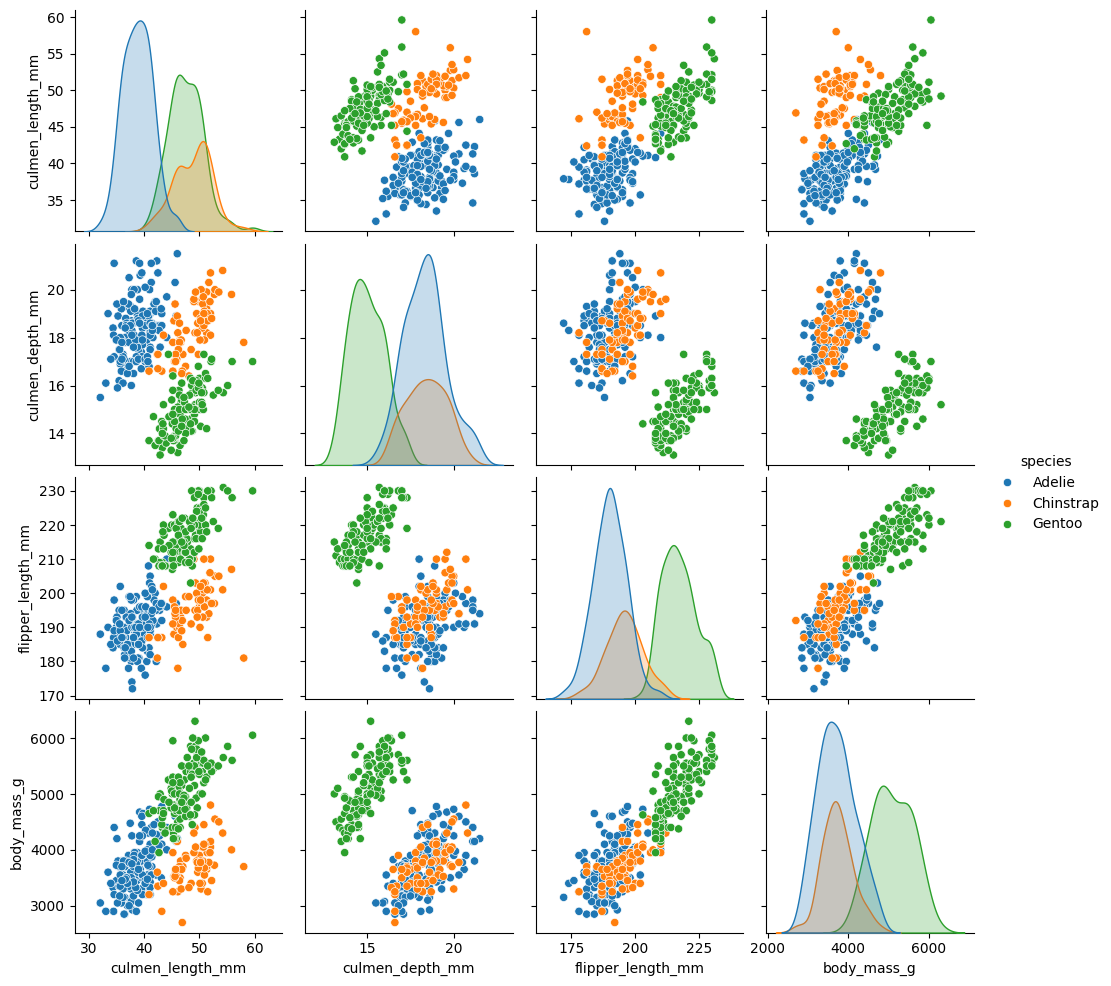

In [ ]:
# General Pairplot colored by species
sns.pairplot(df, hue='species');

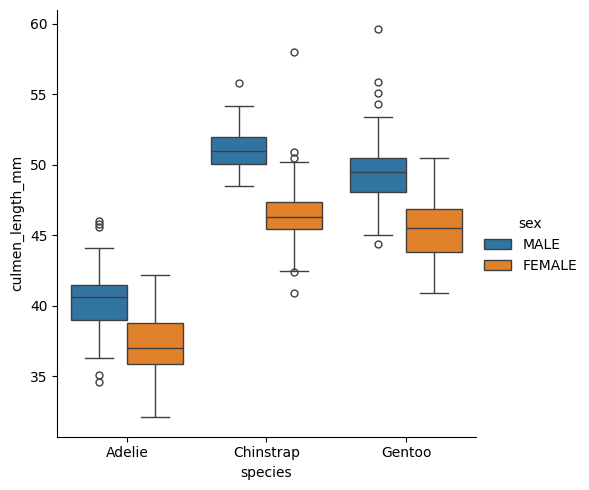

In [ ]:
# Display boxplots of a feature  for each species colored by gender
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', hue='sex');

## Feature Engineering

[Feature engineering](https://www.ibm.com/think/topics/feature-engineering) is the process of changing raw data into useful information for machine learning, focusing on selecting important input variables to improve how well models can make predictions.

The categorical variables need to be transformed into numeric type (binary). Machine Learning algorithms work best with numerical variables.

We use Pandas [get_dummies function](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [ ]:
# We use Pandas get_dummies function

pd.get_dummies(df).head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


In [ ]:
# Drop the species column since it will be used to predict
# Also, we will drop the first of the dummy variables, since part of the information is redundant
pd.get_dummies(df.drop('species',axis=1), drop_first=True).head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True


## Train | Test Split

We will construct a predictive model.
We will try to predict the species of a penguin given the values of the rest of variables.

In [ ]:
# X is the general penguin information, the species is the target variable y .
X = pd.get_dummies(df.drop('species',axis=1), drop_first=True)
y = df['species']
print('Penguin characteristics: ', X.head())
print('Target:', y.head())

Penguin characteristics:     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   island_Dream  island_Torgersen  sex_MALE  
0         False              True      True  
1         False              True     False  
2         False              True     False  
4         False              True     False  
5         False              True      True  
Target: 0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


In [ ]:
# Use the 'train_test-split' function to split the data into training and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training size: ', len(X_train))
print('Testing size: ', len(X_test))


Training size:  266
Testing size:  67


# Decision Trees

[Decision trees](https://scikit-learn.org/stable/modules/tree.html) are a non-parametric supervised learning method used for [classification](https://scikit-learn.org/stable/modules/tree.html#tree-classification) and [regression](https://scikit-learn.org/stable/modules/tree.html#tree-regression). The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Desicion Tree Classifier
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a class capable of performing multi-class classification on a dataset.

### Default Hyperparameters

In [ ]:
# Define the model using the Decision Tree Classifier with the default hyperparameters
model = DecisionTreeClassifier()

In [ ]:
# Try to optimize the model hyperparameters that best fit the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Compare performance between test and train data
y_pred = model.predict(X_test)
pred_train = model.predict(X_train)

## Evaluation

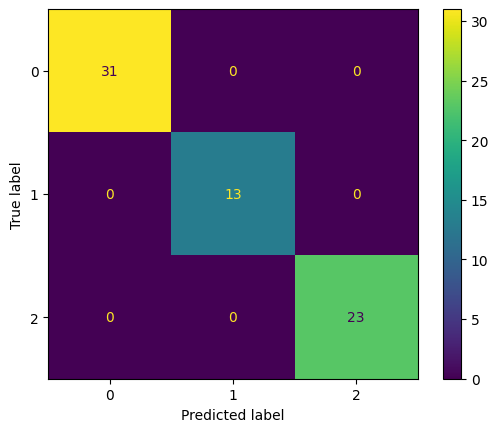

In [ ]:
# Plot the Confusion Matrix of True and Predicted labels
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
accuracy_score(y_train, pred_train)

1.0

In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree")
print(classification_report(y_test, y_pred))



Decision Tree
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

Feature importance in a Decision Tree Classifier shows how much each feature helps in making predictions, with higher scores meaning those features are more important for the model's decisions.





In [ ]:
model.feature_importances_

array([0.34449351, 0.07930054, 0.50590874, 0.        , 0.03358932,
       0.        , 0.03670788])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.344494
culmen_depth_mm,0.079301
flipper_length_mm,0.505909
body_mass_g,0.000000
island_Dream,0.033589
island_Torgersen,0.000000
sex_MALE,0.036708


## Visualize the Tree

The [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), also known as the Gini impurity, is a measure of how often a randomly chosen element from a set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

In machine learning, the Gini coefficient is often used to evaluate the performance of classification models.


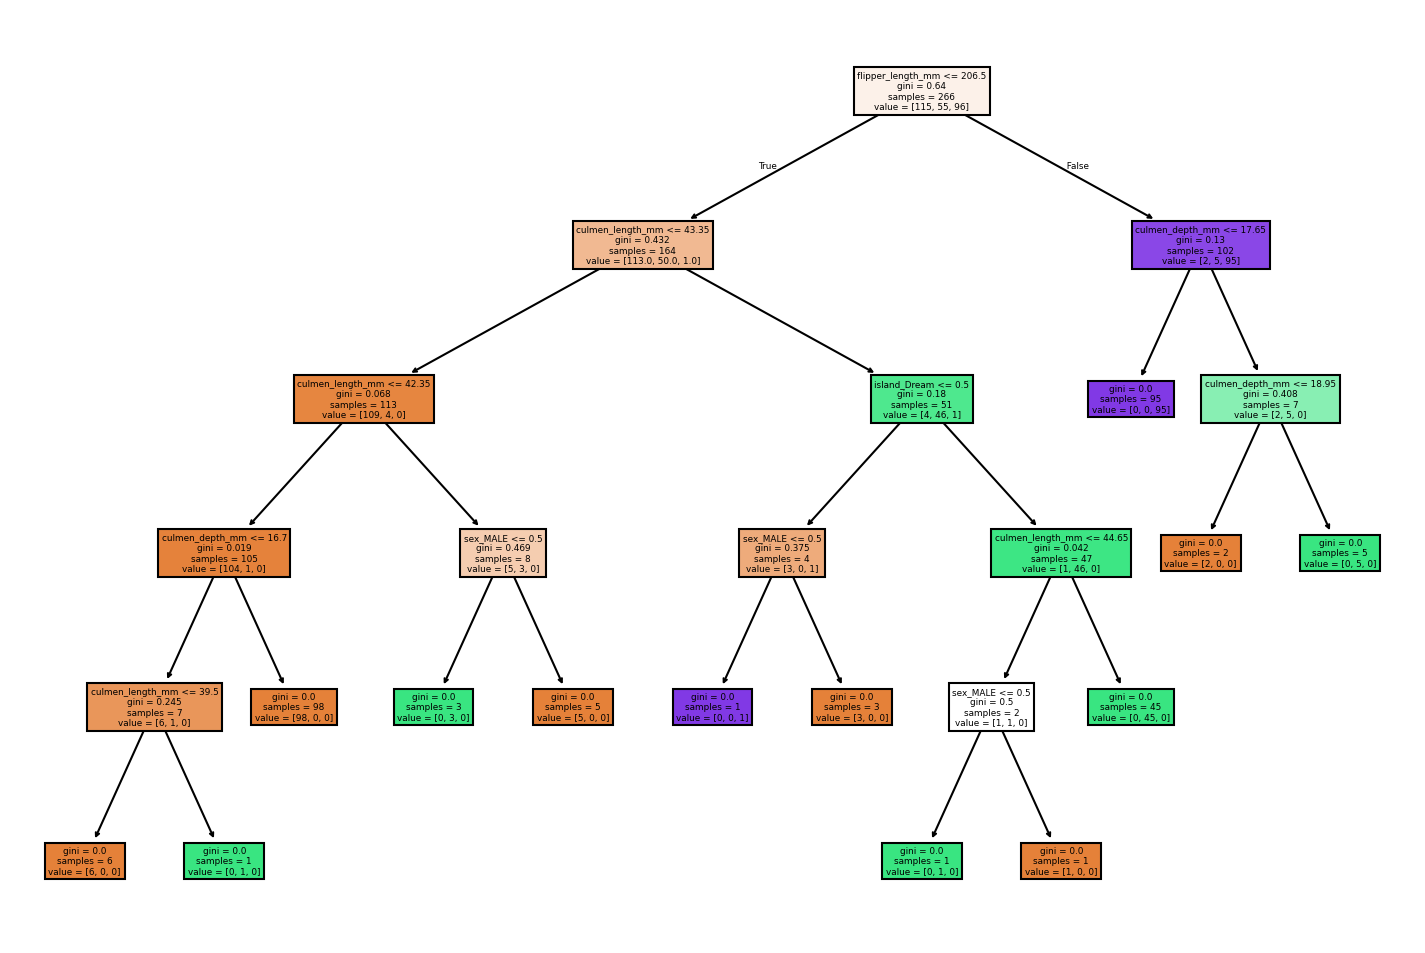

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

##Pruning

In order to reduce the dimensionality in this problem,
from the feature engineering, the body mass seems to have no contribution. We will drop this column.

In [ ]:
X = pd.get_dummies(df.drop(['species','body_mass_g'], axis=1), drop_first=True)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Please see: Scikit-learn [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.

In [ ]:
path=model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00367941, 0.00372359, 0.0056391 , 0.01074114,
       0.0107817 , 0.02150009, 0.03901561, 0.20299609, 0.32382564])

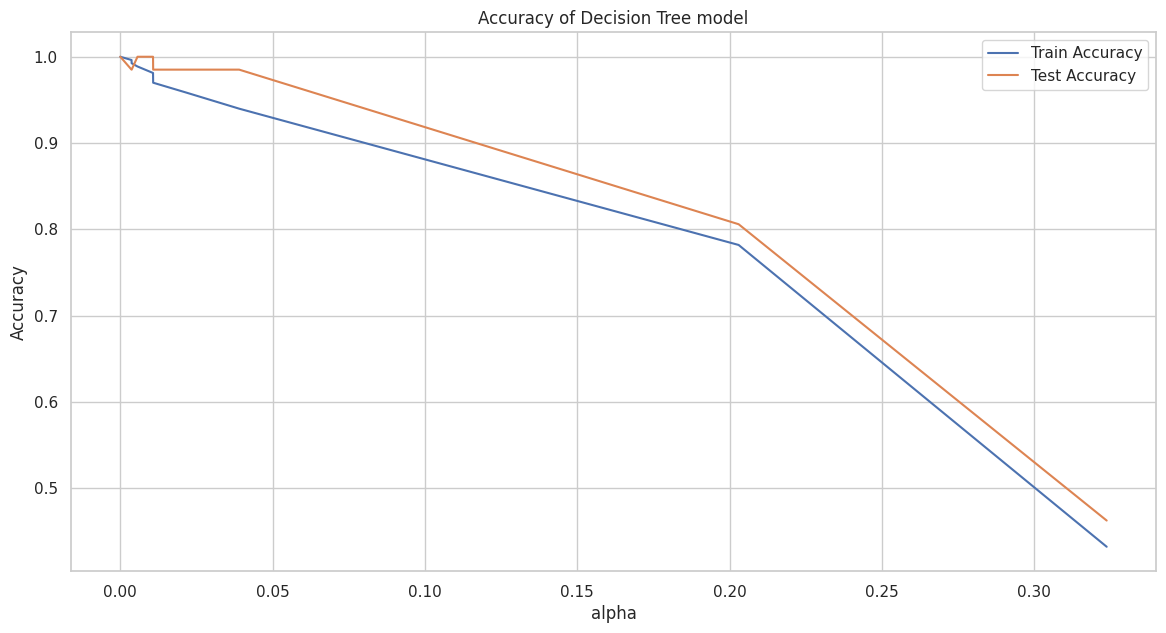

In [ ]:
# Find model accuracy
accuracy_train, accuracy_test = [],[]

for i in alphas :
  tree = DecisionTreeClassifier(criterion="gini", ccp_alpha=i)

  tree.fit(X_train, y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)

  accuracy_train.append(accuracy_score(y_train, y_train_pred))
  accuracy_test.append(accuracy_score(y_test, y_test_pred))


sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label='Train Accuracy')
sns.lineplot(y=accuracy_test, x=alphas, label='Test Accuracy')
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy of Decision Tree model")

plt.show()


## Pruning from Docs Sklearn

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

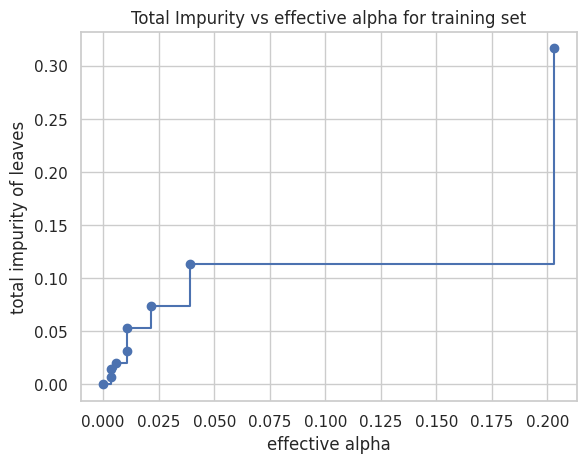

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post");
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3238256386265066


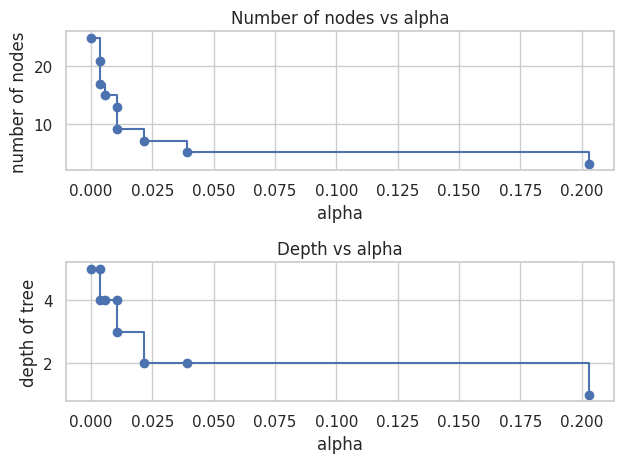

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

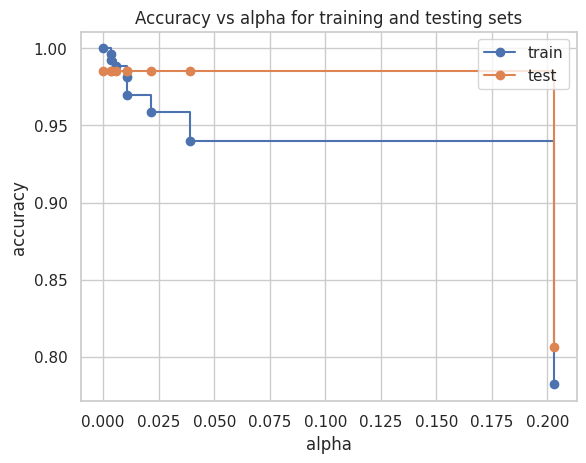

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


# DecisionTree Regression

Decision trees can also be applied to regression problems, using the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) class.

Scikit-learn provides a set of toy [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) for testing.

[diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset): Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
# Use the Diabetes dataset available
diabetes = datasets.load_diabetes()

In [ ]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
346,0.005383,0.050680,0.017506,0.032201,0.127771,0.127390,-0.021311,0.071210,0.062578,0.015491,139.0
94,-0.078165,-0.044642,-0.016984,-0.012556,-0.000193,-0.013527,0.070730,-0.039493,-0.041176,-0.092204,90.0
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357,77.0
347,0.038076,0.050680,-0.029918,-0.074527,-0.012577,-0.012587,0.004460,-0.002592,0.003709,-0.030072,88.0
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333,262.0


In [ ]:
#Lets create feature matrix X  and y labels
X_diabetes = df.drop('target', axis=1)
y_diabetes = df['target']

In [ ]:
X_train_diabetes,X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size= 0.2, random_state= 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_diabetes, y_train_diabetes)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_test_diabetes = dtr.predict(X_test_diabetes)
np.sqrt(mean_squared_error(y_test_diabetes, y_pred_test_diabetes))

np.float64(71.16210328412325)

In [ ]:
y_pred_train_diabetes = dtr.predict(X_train_diabetes)
np.sqrt(mean_squared_error(y_train_diabetes, y_pred_train_diabetes))

np.float64(0.0)

In [ ]:
# print(y_train_diabetes)
# print(y_pred_train_diabetes)

In [ ]:
# Compute the cost complexity pruning path
path=dtr.cost_complexity_pruning_path(X_train_diabetes, y_train_diabetes)
alphas = path['ccp_alphas']

In [ ]:
#print(alphas)

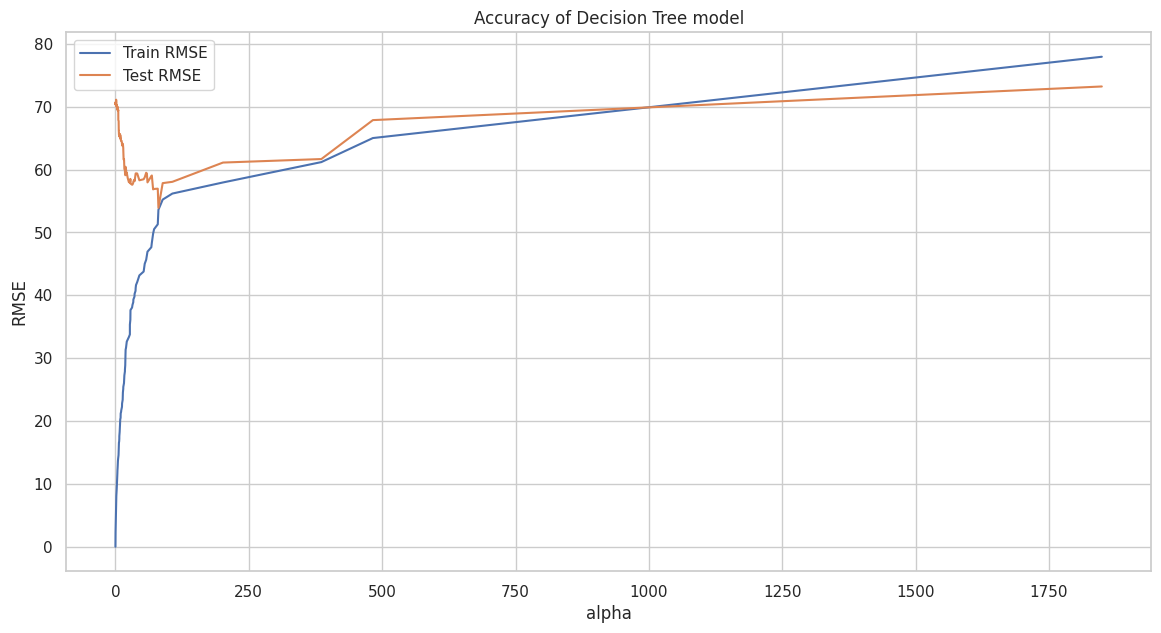

In [ ]:
# Compute the root mean square error
rmse_train, rmse_test=[],[]

for i in alphas :
  tree = DecisionTreeRegressor(random_state= 42, ccp_alpha=i)

  tree.fit(X_train_diabetes,y_train_diabetes)
  y_train_pred_diabetes = tree.predict(X_train_diabetes)
  y_test_pred_diabetes = tree.predict(X_test_diabetes)

  rmse_train.append(np.sqrt(mean_squared_error(y_train_diabetes, y_train_pred_diabetes)))
  rmse_test.append(np.sqrt(mean_squared_error(y_test_diabetes, y_test_pred_diabetes)))


sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.lineplot(y=rmse_train, x=alphas, label='Train RMSE')
sns.lineplot(y=rmse_test, x=alphas, label='Test RMSE')
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Accuracy of Decision Tree model")

plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 42, ccp_alpha=80.0)
dtr.fit(X_train_diabetes, y_train_diabetes)

DecisionTreeRegressor(ccp_alpha=80.0, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_dtr = dtr.predict(X_test_diabetes)
np.sqrt(mean_squared_error(y_test_diabetes, y_pred_dtr))


np.float64(56.96358912067838)

In [ ]:
y_pred_train_dtr = dtr.predict(X_train_diabetes)
np.sqrt(mean_squared_error(y_train_diabetes, y_pred_train_dtr))

np.float64(51.29737762156755)

In [ ]:
df['target'].mean()

np.float64(152.13348416289594)

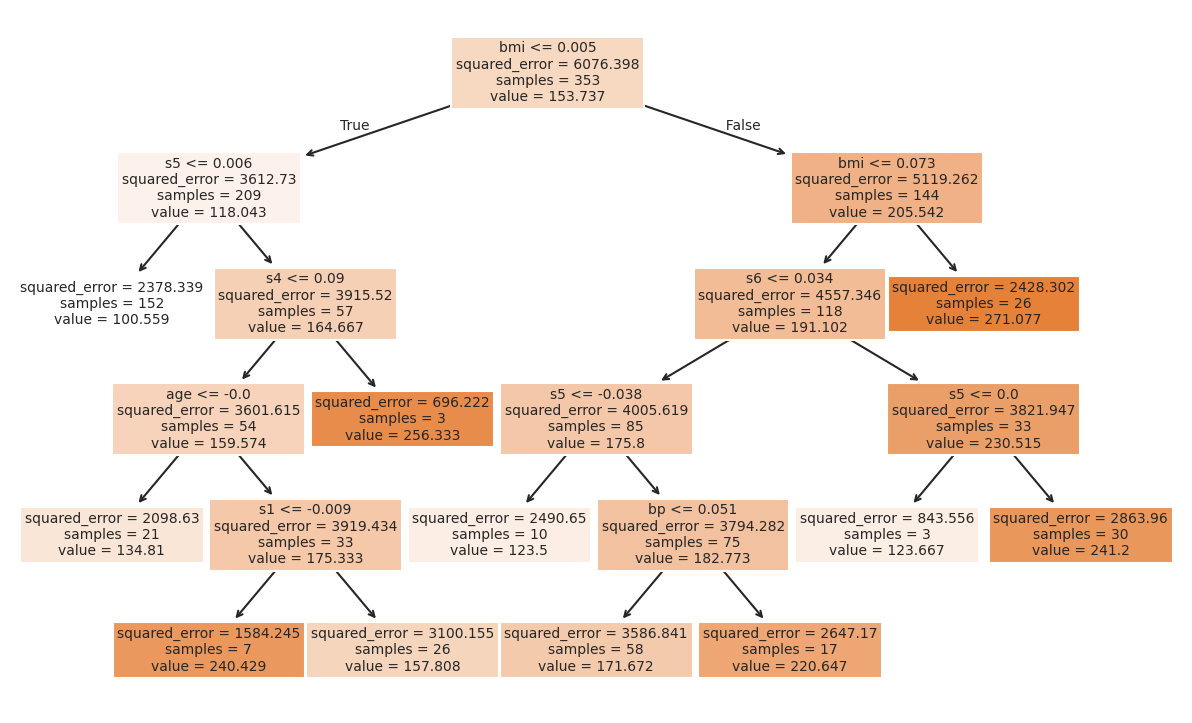

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plot_tree(dtr, filled=True, feature_names=X_diabetes.columns);

In [ ]:
dtr.feature_importances_

array([0.01733002, 0.        , 0.64881198, 0.02592968, 0.03095822,
       0.        , 0.        , 0.02188085, 0.19656915, 0.0585201 ])

In [ ]:
pd.DataFrame(index=X_train_diabetes.columns, data=dtr.feature_importances_, columns=['Feature Importance'])

,Feature Importance
age,0.017330
sex,0.000000
bmi,0.648812
bp,0.025930
s1,0.030958
s2,0.000000
s3,0.000000
s4,0.021881
s5,0.196569
s6,0.058520


#Ensemble Learning

[Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#) combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two very famous examples of ensemble methods are [gradient-boosted trees](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) and [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest).

More generally, ensemble models can be applied to any base learner beyond trees, in averaging methods such as [Bagging methods](https://scikit-learn.org/stable/modules/ensemble.html#bagging), [model stacking](https://scikit-learn.org/stable/modules/ensemble.html#stacking), or [Voting](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier), or in boosting, as [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).

##Bagging Classifiers

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=20)

In [ ]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=20)

In [ ]:
bag_clf_pred_test = bag_clf.predict(X_test)
bag_clf_pred_train = bag_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, bag_clf_pred_test))
print(accuracy_score(y_train, bag_clf_pred_train))

1.0
1.0


## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(n_estimators=20)

In [ ]:
bag_reg.fit(X_train_diabetes, y_train_diabetes)
y_pred_bagregr = bag_reg.predict(X_test_diabetes)
np.sqrt(mean_squared_error(y_test_diabetes, y_pred_bagregr))

np.float64(55.72468211330786)

In [ ]:
y_pred_bagregr_train = bag_reg.predict(X_train_diabetes)
np.sqrt(mean_squared_error(y_train_diabetes, y_pred_bagregr_train))

np.float64(22.715795505310695)

##Bagging Clasifiers with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = BaggingClassifier(n_estimators=20, base_estimator=GaussianNB())

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = BaggingClassifier(estimator=GaussianNB(), n_estimators=20)
# Replace 'base_estimator' with 'estimator'

In [ ]:
nb_clf.fit(X_train, y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=20)

In [ ]:
nb_clf_pred = nb_clf.predict(X_test)
nb_clf_pred_train = nb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, nb_clf_pred))
print(accuracy_score(y_train, nb_clf_pred_train))

0.8656716417910447
0.8082706766917294


##Voting Classifiers

The idea behind the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses.



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


clf1 = LogisticRegression(solver='lbfgs', random_state=42)
clf2 =RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1,2,1], flatten_transform=True)


In [ ]:
# First VotingClassifier
eclf1 = eclf1.fit(X_train, y_train)

In [ ]:
eclf1_pred = eclf1.predict(X_test)
eclf1_pred_train = eclf1.predict(X_train)

In [ ]:
print(accuracy_score(y_test, eclf1_pred))
print(accuracy_score(y_train, eclf1_pred_train))

0.9850746268656716
0.9962406015037594


In [ ]:
# eclf1: hard vote
for clf in (clf1, clf2, clf3, eclf1):
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9850746268656716
RandomForestClassifier 1.0
GaussianNB 0.8656716417910447
VotingClassifier 0.9850746268656716


In [ ]:
# eclf2: soft vote
for clf in (clf1, clf2, clf3, eclf2):
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9850746268656716
RandomForestClassifier 1.0
GaussianNB 0.8656716417910447
VotingClassifier 0.9850746268656716


In [ ]:
# eclf3: soft vote with weights
for clf in (clf1, clf2, clf3, eclf3):
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9850746268656716
RandomForestClassifier 1.0
GaussianNB 0.8656716417910447
VotingClassifier 0.9850746268656716


##Random Forest Classifiers

The [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module includes two averaging algorithms based on randomized decision trees: the [RandomForest algorithm and the Extra-Trees method](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles). Both algorithms are perturb-and-combine techniques specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

We explore the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=20, oob_score=True)

In [ ]:
randf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, oob_score=True)

In [ ]:
randf_pred = randf.predict(X_test)
randf_pred_train = randf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, randf_pred))
print(accuracy_score(y_train, randf_pred_train))

1.0
1.0


In [ ]:
# Score of the training dataset obtained using an out-of-bag estimate.
randf.oob_score_

In [ ]:
randf.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns, data=randf.feature_importances_, columns=['Feature Importance'])

##RandomForest Regressor



A [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randf_reg = RandomForestRegressor(oob_score=True)

In [ ]:
randf_reg.fit(X_train_diabetes, y_train_diabetes)

RandomForestRegressor(oob_score=True)

In [ ]:
y_pred_randf_reg = randf_reg.predict(X_test_diabetes)
np.sqrt(mean_squared_error(y_test_diabetes, y_pred_randf_reg))

np.float64(55.63867303484737)

In [ ]:
y_pred_train_randf_reg = randf_reg.predict(X_train_diabetes)
np.sqrt(mean_squared_error(y_train_diabetes, y_pred_train_randf_reg))

np.float64(21.95982197794682)

In [ ]:
randf_reg.oob_score_

0.42970922390223787

##AdaBoost

The core principle of [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost) is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=20)
ada_clf.fit(X_train, y_train)

In [ ]:
ada_clf_pred = ada_clf.predict(X_test)
ada_clf_pred_train = ada_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, ada_clf_pred))
print(accuracy_score(y_train, ada_clf_pred_train))

##AdaBoost with LogisticRegressor base estimator

In [ ]:
from sklearn.linear_model import LogisticRegression
ada_logreg = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20)
ada_logreg.fit(X_train, y_train)

In [ ]:
ada_logreg_pred = ada_logreg.predict(X_test)
ada_logreg_pred_train = ada_logreg.predict(X_train)

In [ ]:
print(accuracy_score(y_test, ada_logreg_pred))
print(accuracy_score(y_train, ada_logreg_pred_train))

##AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=20)
ada_reg.fit(X_train_diabetes, y_train_diabetes)

In [ ]:
ada_reg_pred = ada_reg.predict(X_test_diabetes)
ada_reg_pred_train = ada_reg.predict(X_train_diabetes)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_diabetes, ada_reg_pred)))
print(np.sqrt(mean_squared_error(y_train_diabetes, ada_reg_pred_train)))

## Gradient Boosting

[Gradient Boosting for classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier).

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20)
gb_clf.fit(X_train, y_train)

In [ ]:
gb_pred = gb_clf.predict(X_test)
gb_pred_train = gb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test,gb_pred))
print(accuracy_score(y_train,gb_pred_train))

##XGBoost Classifiers

[XGBoost](https://arxiv.org/abs/1603.02754)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Using wines dataset
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split


X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_pred_train = xgb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, xgb_clf_pred))
print(accuracy_score(y_train, xgb_clf_pred_train))

Param tuning guide :
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
xgb_clf = XGBClassifier(gamma=0.25, max_depth=2, learning_rate=0.1, reg_lambda=10)
xgb_clf.fit(X_train, y_train)

In [ ]:
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_pred_train = xgb_clf.predict(X_train)

In [ ]:
print(accuracy_score(y_test, xgb_clf_pred))
print(accuracy_score(y_train, xgb_clf_pred_train))

##XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbreg = XGBRegressor()
xgbreg.fit(X_train_diabetes, y_train_diabetes)

In [ ]:
xgbreg_pred = xgbreg.predict(X_test_diabetes)
xgbreg_pred_train = xgbreg.predict(X_train_diabetes)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_diabetes, xgbreg_pred)))
print(np.sqrt(mean_squared_error(y_train_diabetes, xgbreg_pred_train)))

Perhaps the most commonly configured hyperparameters are the following:

_n_estimators_: The number of trees in the ensemble, often increased until no further improvements are seen.

_max_depth_: The maximum depth of each tree, often values are between 1 and 10.

_eta_: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

_subsample_: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

_colsample_bytree_: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [ ]:
xgbmodel = XGBRegressor(gamma=0.25, max_depth=1, learning_rate=0.1, reg_lambda=10, n_estimators=100)

In [ ]:
xgbmodel.fit(X_train_diabetes, y_train_diabetes, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(X_train_diabetes, y_train_diabetes)], verbose=False)

In [ ]:
xgbmodel_pred = xgbmodel.predict(X_test_diabetes)
xgbmodel_pred_train = xgbmodel.predict(X_train_diabetes)

In [ ]:
print(np.sqrt(mean_squared_error(y_test_diabetes, xgbmodel_pred)))
print(np.sqrt(mean_squared_error(y_train_diabetes, xgbmodel_pred_train)))